[Reference](https://github.com/polygon-software/python-visual-odometry/blob/master/Chapter%203%20-%20Camera%20Projection.ipynb)


In [1]:
import numpy as np
import math
import cv2
import numpy
import cameraCalibration
import glob
from IPython.display import Image
import itertools

In [2]:
cameras = range(160,172)

images_path = []
images_calib = []
for cam in cameras:
    name = f"{cam}.yaml"

    intrinsic_yaml_file = "intrinsic/" + name
    extrinsic_yaml_file = "extrinsic/" + name
    calib = cameraCalibration.Camera_config(intrinsic_yaml_file, extrinsic_yaml_file, name)
    filepattern = "camera_data/" + str(cam) + "/" + "*"
    images_calib.append(calib)
    images_path.append(glob.glob("camera_data/" + str(cam) + "/" + "*" )[0])

In [3]:
camera_index = 2
images_path[camera_index]

'camera_data/162/raw_1719492644_162.jpg'

In [4]:
range_w = [range(0,5,1),range(0,5,1),range(0,1,1)] # specify range of WORLD coordinates here
coordinates_w = np.array(list(([float(Xw), float(Yw), float(Zw)] for (Xw,Yw,Zw) in list(itertools.product(*range_w)))))
ones = np.ones( coordinates_w.shape[0]).reshape(-1,1)

In [5]:
K= np.array(images_calib[camera_index].in_K).reshape(3, 3)
D= np.array(images_calib[camera_index].in_D)
rot_mat = np.array(images_calib[camera_index].ex_rot_mat)
t_vec = np.array(images_calib[camera_index].ex_t_vec)
pix_w = images_calib[camera_index].width
pix_h = images_calib[camera_index].height

In [6]:
print("Number of cameras image path and calibration file paths (should be equal)",len(images_calib), len(images_path))

Number of cameras image path and calibration file paths (should be equal) 12 12


In [7]:
t_vec

array([[-3.06866446],
       [-0.94295751],
       [ 8.71317665]])

In [8]:
D

array([[-3.88152938e-01],
       [ 2.12820433e-01],
       [-3.72351525e-04],
       [ 7.34823291e-05],
       [-7.19148769e-02]])

In [9]:
K

array([[2.14032008e+03, 0.00000000e+00, 1.92900055e+03],
       [0.00000000e+00, 2.13527808e+03, 1.09677458e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [10]:
pix_w, pix_h

(3840, 2160)

```
[[ f   0  u0 ],
 [0    f  v0 ],
 [0    0  1  ]]


[[2218.1174  0         1936.53691 ~ 3840/2],
 [0          2215.8033 1091.57393 ~ 2160],
 [0          0         1                ]]
```

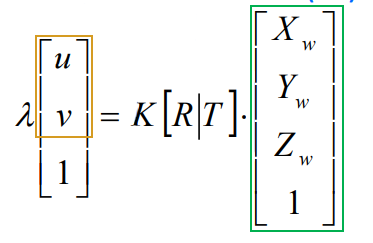

In [11]:
rot_mat

array([[-0.95179042,  0.00388425, -0.30672447],
       [ 0.00957075,  0.99980904, -0.01703757],
       [ 0.30659972, -0.01915177, -0.95164585]])

In [12]:

coordinates_w_one_padded = np.concatenate((coordinates_w , ones), axis=1)
print(coordinates_w_one_padded.shape)
coordinates_w_one_padded

(25, 4)


array([[0., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 2., 0., 1.],
       [0., 3., 0., 1.],
       [0., 4., 0., 1.],
       [1., 0., 0., 1.],
       [1., 1., 0., 1.],
       [1., 2., 0., 1.],
       [1., 3., 0., 1.],
       [1., 4., 0., 1.],
       [2., 0., 0., 1.],
       [2., 1., 0., 1.],
       [2., 2., 0., 1.],
       [2., 3., 0., 1.],
       [2., 4., 0., 1.],
       [3., 0., 0., 1.],
       [3., 1., 0., 1.],
       [3., 2., 0., 1.],
       [3., 3., 0., 1.],
       [3., 4., 0., 1.],
       [4., 0., 0., 1.],
       [4., 1., 0., 1.],
       [4., 2., 0., 1.],
       [4., 3., 0., 1.],
       [4., 4., 0., 1.]])

In [13]:
R_world_to_cam = rot_mat
R_cam_to_gazebocam = np.array([[0.0, 0.0, 1.0], [-1.0, 0.0, 0.0], [0.0, -1.0, 0.0]])
R_world_to_gazebocam = np.matmul(R_cam_to_gazebocam, R_world_to_cam)


### Pick one!

In [ ]:
RT = np.concatenate((R_world_to_gazebocam, t_vec), axis=1) 
# RT = np.concatenate((rot_mat, t_vec), axis=1)

In [14]:

RT # Matrix of extrinsic parameters

array([[ 3.06599724e-01, -1.91517743e-02, -9.51645847e-01,
        -3.06866446e+00],
       [ 9.51790423e-01, -3.88424895e-03,  3.06724473e-01,
        -9.42957515e-01],
       [-9.57074727e-03, -9.99809043e-01,  1.70375657e-02,
         8.71317665e+00]])


# From World to Camera


In [15]:
camera_coordinates = np.matmul(RT, np.transpose(coordinates_w_one_padded))
camera_coordinates 

array([[-3.06866446e+00, -3.08781623e+00, -3.10696801e+00,
        -3.12611978e+00, -3.14527155e+00, -2.76206473e+00,
        -2.78121651e+00, -2.80036828e+00, -2.81952006e+00,
        -2.83867183e+00, -2.45546501e+00, -2.47461678e+00,
        -2.49376856e+00, -2.51292033e+00, -2.53207211e+00,
        -2.14886529e+00, -2.16801706e+00, -2.18716883e+00,
        -2.20632061e+00, -2.22547238e+00, -1.84226556e+00,
        -1.86141734e+00, -1.88056911e+00, -1.89972088e+00,
        -1.91887266e+00],
       [-9.42957515e-01, -9.46841764e-01, -9.50726013e-01,
        -9.54610261e-01, -9.58494510e-01,  8.83290882e-03,
         4.94865987e-03,  1.06441093e-03, -2.81983802e-03,
        -6.70408696e-03,  9.60623332e-01,  9.56739083e-01,
         9.52854834e-01,  9.48970585e-01,  9.45086337e-01,
         1.91241376e+00,  1.90852951e+00,  1.90464526e+00,
         1.90076101e+00,  1.89687676e+00,  2.86420418e+00,
         2.86031993e+00,  2.85643568e+00,  2.85255143e+00,
         2.84866718e+00],
    

In [16]:
imageplane_coordinates  = np.matmul(K, camera_coordinates)
imageplane_coordinates

array([[1.02397984e+04, 8.27017528e+03, 6.30055216e+03, 4.33092904e+03,
        2.36130592e+03, 1.08775580e+04, 8.90793485e+03, 6.93831173e+03,
        4.96868861e+03, 2.99906549e+03, 1.15153175e+04, 9.54569441e+03,
        7.57607129e+03, 5.60644818e+03, 3.63682506e+03, 1.21530771e+04,
        1.01834540e+04, 8.21383086e+03, 6.24420774e+03, 4.27458462e+03,
        1.27908367e+04, 1.08212135e+04, 8.85159043e+03, 6.88196731e+03,
        4.91234419e+03],
       [7.54291414e+03, 6.43805505e+03, 5.33319596e+03, 4.22833686e+03,
        3.12347777e+03, 9.56475442e+03, 8.45989532e+03, 7.35503623e+03,
        6.25017714e+03, 5.14531804e+03, 1.15865947e+04, 1.04817356e+04,
        9.37687650e+03, 8.27201741e+03, 7.16715832e+03, 1.36084350e+04,
        1.25035759e+04, 1.13987168e+04, 1.02938577e+04, 9.18899859e+03,
        1.56302752e+04, 1.45254161e+04, 1.34205570e+04, 1.23156980e+04,
        1.12108389e+04],
       [8.71317665e+00, 7.71336761e+00, 6.71355857e+00, 5.71374953e+00,
        4.7139

In [17]:
uv_coordinates = imageplane_coordinates/imageplane_coordinates[2]
# uv_coordinates[2] # ONE ONLY
print(uv_coordinates.shape)
uv_coordinates[:2]

(3, 25)


array([[1175.20840008, 1072.18736271,  938.48174467,  757.98370587,
         500.91975706, 1249.77602147, 1156.30448225, 1034.95291322,
         871.06116416,  637.5063308 , 1324.50781701, 1240.63086616,
        1131.69992391,  984.51871386,  774.64979126, 1399.40432946,
        1325.16729632, 1228.72396152, 1098.3582746 ,  912.35355116,
        1474.46610402, 1409.9145585 , 1326.02621761, 1212.581779  ,
        1050.62105119],
       [ 865.6904872 ,  834.66202756,  794.39181209,  740.02839025,
         662.6044139 , 1098.94157868, 1098.14620917, 1097.11360247,
        1095.71901219, 1093.73164369, 1332.70621472, 1362.28587984,
        1400.70097195, 1452.60523004, 1526.61665256, 1566.98609319,
        1627.08348867, 1705.1576383 , 1810.69308216, 1961.27021264,
        1801.78291944, 1892.541497  , 2010.48734061, 2169.98864762,
        2397.70318423]])

In [18]:
pts = uv_coordinates[:2].reshape((-1, 2))
pts.shape

(25, 2)

/home/mutex/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


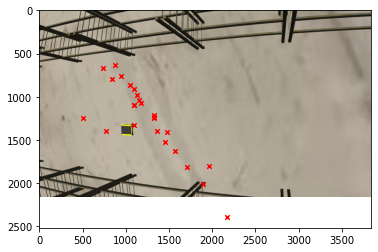

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(images_path[camera_index])
plt.imshow(image)
# plt.plot(640, 570, "og", markersize=10)
plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=20)
plt.show()